In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

In [2]:
dataset = keras.datasets.fashion_mnist 
((train_images, train_labels),(test_images, test_labels)) = dataset.load_data()

Text(0.5, 1.0, '9')

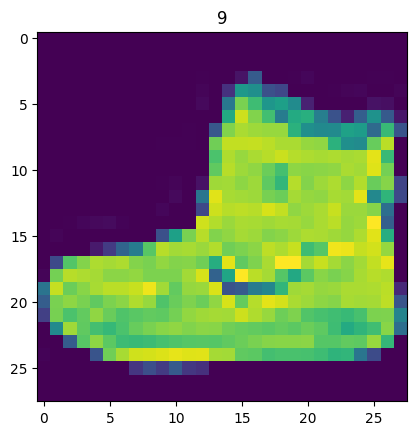

In [3]:
plt.imshow(train_images[0])
plt.title(train_labels[0])

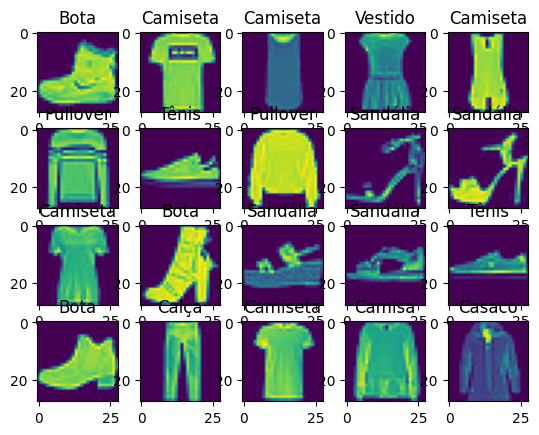

In [4]:
train_labels.min()
train_labels.max()
total_de_classes = 10

nomes = ['Camiseta','Calça','Pullover','Vestido','Casaco','Sandália','Camisa','Tênis','Bolsa','Bota']

for imagem in range(20):
    plt.subplot(4, 5, imagem+1)
    plt.imshow(train_images[imagem])
    plt.title(nomes[train_labels[imagem]])


In [5]:
train_images = train_images/255

modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #camada de entrada, transformando um array de duas dimensões em apenas uma
    keras.layers.Dense(256, activation='relu'), #camada oculta, todos os nodos conectados com os outros, camada de processamento dos dados -> relu todos os numeros negativos viram 0
    keras.layers.Dropout(0.2),#normalização
    #keras.layers.Dense(128, activation='relu'),#camada oculta, mais camadas e neuronios, mais lento o procesasmento e não necessariamente menos perda
    keras.layers.Dense(10, activation='softmax')
])

In [6]:
modelo.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
historico = modelo.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5320 - accuracy: 0.8099 - val_loss: 0.4208 - val_accuracy: 0.8472
Epoch 2/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4000 - accuracy: 0.8546 - val_loss: 0.3735 - val_accuracy: 0.8677
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3622 - accuracy: 0.8660 - val_loss: 0.3502 - val_accuracy: 0.8737
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3408 - accuracy: 0.8748 - val_loss: 0.3498 - val_accuracy: 0.8702
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3246 - accuracy: 0.8799 - val_loss: 0.3455 - val_accuracy: 0.8772
Epoch 6/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3073 - accuracy: 0.8853 - val_loss: 0.3645 - val_accuracy: 0.8684
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2995 - accuracy: 0.8888 - val_loss: 0.3377 - val_accuracy:

In [7]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [8]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]


In [9]:
#pesos_camada_dense.shape
pesos_camada_dense_zerados = np.zeros((784,256))
pesos_camada_dense_aleatorios = np.random.rand(784,256)
modelo.layers[1].set_weights([pesos_camada_dense_zerados, vieses_camada_dense])

In [10]:
modelo.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
historico = modelo.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5368 - accuracy: 0.8083 - val_loss: 0.4086 - val_accuracy: 0.8528
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4098 - accuracy: 0.8507 - val_loss: 0.3707 - val_accuracy: 0.8659
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3766 - accuracy: 0.8614 - val_loss: 0.3612 - val_accuracy: 0.8708
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3543 - accuracy: 0.8693 - val_loss: 0.3547 - val_accuracy: 0.8691
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3362 - accuracy: 0.8744 - val_loss: 0.3300 - val_accuracy: 0.8793
Epoch 6/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3221 - accuracy: 0.8802 - val_loss: 0.3246 - val_accuracy: 0.8827
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3115 - accuracy: 0.8838 - val_loss: 0.3425 - val_accuracy:

In [11]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

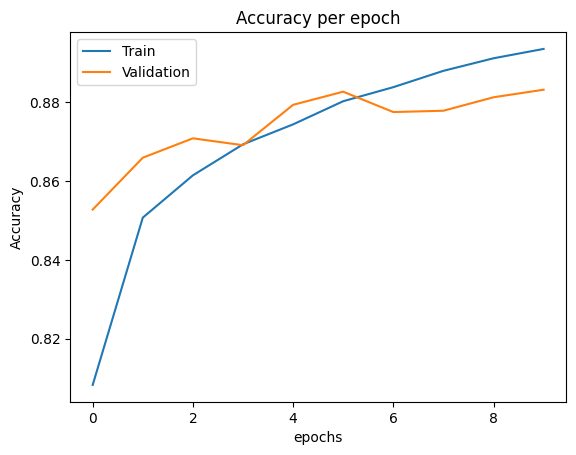

In [12]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Accuracy per epoch')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

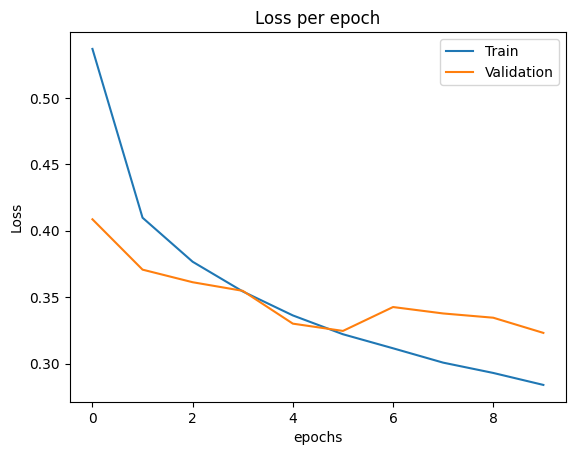

In [13]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Loss per epoch')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

In [14]:
testes = modelo.predict(test_images)
np.argmax(testes[0])

testes_modelo_salvo = modelo_salvo.predict(test_images)
print('Resultado modelo salvo: ', np.argmax(testes_modelo_salvo))

313/313 [==============================] - 1s 2ms/step
Resultado modelo salvo:  9


In [15]:
test_loss, test_accuracy = modelo.evaluate(test_images, test_labels)
print('Perda do teste: ', test_loss)
print('Acuracia do teste: ', test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 54.1531 - accuracy: 0.8544
Perda do teste:  54.15312957763672
Acuracia do teste:  0.8543999791145325


In [16]:
adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)#setando o otimizador adam
modelo.compile(optimizer=adam,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
historico = modelo.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2783 - accuracy: 0.8958 - val_loss: 0.3295 - val_accuracy: 0.8832
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2725 - accuracy: 0.8965 - val_loss: 0.3371 - val_accuracy: 0.8778
Epoch 3/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2642 - accuracy: 0.9010 - val_loss: 0.3274 - val_accuracy: 0.8848
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2600 - accuracy: 0.9028 - val_loss: 0.3330 - val_accuracy: 0.8817
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2528 - accuracy: 0.9041 - val_loss: 0.3212 - val_accuracy: 0.8882
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2479 - accuracy: 0.9068 - val_loss: 0.3235 - val_accuracy: 0.8888
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2433 - accuracy: 0.9071 - val_loss: 0.3370 - val_accuracy:

In [19]:
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss'),
            keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.h5',
                            monitor='val_loss',
                            save_best_only=True)]

In [20]:
historico = modelo.fit(train_images, train_labels, epochs=10, validation_split=0.2, batch_size=256, callbacks = callbacks)

Epoch 1/10
188/188 [==============================] - 2s 10ms/step - loss: 0.1625 - accuracy: 0.9385 - val_loss: 0.3247 - val_accuracy: 0.8972
Epoch 2/10
188/188 [==============================] - 2s 10ms/step - loss: 0.1582 - accuracy: 0.9406 - val_loss: 0.3226 - val_accuracy: 0.8990
